In [48]:
import pandas as pd

df = pd.read_excel('Correspondence.xlsx')

# # Define a function for spliting
def split_name_and_year(full_string):
    
    # Attempt to split the string from the right
    parts = full_string.rsplit(', ', 1)
    
    # If there is only one part, return the name and an empty year
    if len(parts) == 1:
        return parts[0], ''
        
    # If the last part after the split is a year or a year range
    else:
        name_part, year_part = parts
        
        # Take it as a year only if the year_part is entirely numeric or matches the format of a year range
        if year_part.isdigit() or '-' in year_part:
            return name_part, year_part
        else:
            return full_string, ''  # If it doesn't match the format, return the full string and an empty year

# Use the apply method to apply the split function
df[['Name', 'Year']] = df['name'].apply(lambda x: pd.Series(split_name_and_year(x)))

print(df)


                                page_id  \
0            FS-FSA_A.01_02.1Abbott.001   
1            FS-FSA_A.01_02.1Abbott.002   
2               FS-FSA_A.01_02.1Abe.001   
3               FS-FSA_A.01_02.1Abe.002   
4               FS-FSA_A.01_02.1Abe.003   
...                                 ...   
12562  FS-FSA_A.01_02.1Unidentified.003   
12563  FS-FSA_A.01_02.1Unidentified.004   
12564  FS-FSA_A.01_02.1Unidentified.005   
12565  FS-FSA_A.01_02.1Unidentified.006   
12566  FS-FSA_A.01_02.1Unidentified.007   

                                          name  \
0                         Abbott, Holker, 1904   
1                         Abbott, Holker, 1904   
2                       Abe Shojiro, 1911-1913   
3                       Abe Shojiro, 1911-1913   
4                       Abe Shojiro, 1911-1913   
...                                        ...   
12562  Unidentified correspondents, 1906, 1908   
12563  Unidentified correspondents, 1906, 1908   
12564  Unidentified correspondent

In [49]:
import pandas as pd

# 读取Excel文件
df = pd.read_excel('Correspondence.xlsx')

# 排除 page_id 列中包含指定标识符的行
unidentified_range = [f'FS-FSA_A.01_02.1Unidentified.{str(i).zfill(3)}' for i in range(1, 8)]
df_filtered = df[~df['page_id'].isin(unidentified_range)]

# 定义一个拆分函数
def split_name_and_year(full_string):
    # 尝试从右边拆分字符串
    parts = full_string.rsplit(', ', 1)
    # 如果只有一个部分，返回名称和空的年份
    if len(parts) == 1:
        return parts[0], ''
    # 如果分割后的最后一个部分是一个年份或者年份范围
    else:
        name_part, year_part = parts
        # 仅当 year_part 全是数字或符合年份范围的格式时，才认为它是年份
        if year_part.isdigit() or '-' in year_part:
            return name_part, year_part
        else:
            return full_string, ''  # 如果不符合格式，返回完整的字符串和空的年份

# 使用 apply 方法应用拆分函数，将 name 列拆分为 Name 和 Year 列
df_filtered[['Name', 'Year']] = df_filtered['name'].apply(lambda x: pd.Series(split_name_and_year(x)))

# 删除原来的 'name' 列（如果不再需要）
df_filtered = df_filtered.drop(columns=['name'])

# 展示最终的 DataFrame
# print(df_filtered)


# 将结果保存到临时的Excel文件
temp_file_path = 'temp_ret_one.xlsx'
df_filtered.to_excel(temp_file_path, index=False)


/var/folders/2q/4pt3l1310hsdw3s3474_y5p80000gn/T/ipykernel_2975/2145566563.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Name', 'Year']] = df_filtered['name'].apply(lambda x: pd.Series(split_name_and_year(x)))
/var/folders/2q/4pt3l1310hsdw3s3474_y5p80000gn/T/ipykernel_2975/2145566563.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Name', 'Year']] = df_filtered['name'].apply(lambda x: pd.Series(split_name_and_year(x)))


In [1]:
# 这个文件年份没有提完
import pandas as pd
import re

# 读取Excel文件
df = pd.read_excel('temp_ret_one.xlsx')

# Function to extract years from Name column
def extract_years_from_name(name):
    if pd.isna(name):
        return None
    # Regex to find patterns like '1905', '1911-1913', etc.
    match = re.search(r'(\d{4})(?:-(\d{4}))?', name)
    if match:
        start_year = match.group(1)
        end_year = match.group(2)
        if end_year:
            return f"{start_year}-{end_year}"
        else:
            return start_year
    return None

# Apply the extraction function to rows where Year is missing
df['Year'] = df.apply(lambda row: extract_years_from_name(row['Name']) if pd.isna(row['Year']) else row['Year'], axis=1)

# Display the updated dataframe (for checking)
print(df.head())

# 保存更新后的文件
df.to_excel('updated_temp_ret_one.xlsx', index=False)


                      page_id  \
0  FS-FSA_A.01_02.1Abbott.001   
1  FS-FSA_A.01_02.1Abbott.002   
2     FS-FSA_A.01_02.1Abe.001   
3     FS-FSA_A.01_02.1Abe.002   
4     FS-FSA_A.01_02.1Abe.003   

                                             content            Name  \
0  #33 Ferry Avenue,\nDetroit, Michigan,\nAugust ...  Abbott, Holker   
1  -2-\n\nIn the meantime, it may please you to k...  Abbott, Holker   
2  #2\n\nMr. C. L. Freer.\nDetroit.\nKobe Dec. 23...     Abe Shojiro   
3  while he was teaching in High school of the ci...     Abe Shojiro   
4  1\n\nansi  \n\nMr. C. L. Freer,\nDetroit.\n\nK...     Abe Shojiro   

        Year  
0       1904  
1       1904  
2  1911-1913  
3  1911-1913  
4  1911-1913  


In [1]:
import pandas as pd
import re

df_filtered = pd.read_excel('updated_temp_ret_one.xlsx')


# 确保所有content列中的值都是字符串
df_filtered['content'] = df_filtered['content'].astype(str)

# 确保所有year列中的值都是字符串
df_filtered['Year'] = df_filtered['Year'].astype(str)

# 定义函数来处理年份
def process_year(row):
    year = row['Year']
    content = row['content']
    
    # 如果content为空，则保持年份不变
    if not content.strip():
        return year
    
    # 确保content是字符串
    if not isinstance(content, str):
        content = str(content)
    
    # 如果年份是一个范围（四位数-四位数），则从content中识别具体年份
    if re.match(r'\d{4}-\d{4}', year):
        try:
            # 使用正则表达式匹配年份
            matches = re.findall(r'\b(189\d|19[0-1]\d)\b', content)
            if matches:
                # 返回第一个匹配的年份
                return matches[0]
        except Exception as e:
            print(f"Error parsing content: {content}, Error: {e}")
    
    # 如果年份不是范围，直接返回原始年份
    return year

# 应用函数并更新year列
df_filtered['refined_year'] = df_filtered.apply(process_year, axis=1)

print(df_filtered.head()) 

# 将结果保存到临时的Excel文件
temp_file_path = 'temp_ret_two.xlsx'
df_filtered.to_excel(temp_file_path, index=False)



                      page_id  \
0  FS-FSA_A.01_02.1Abbott.001   
1  FS-FSA_A.01_02.1Abbott.002   
2     FS-FSA_A.01_02.1Abe.001   
3     FS-FSA_A.01_02.1Abe.002   
4     FS-FSA_A.01_02.1Abe.003   

                                             content            Name  \
0  #33 Ferry Avenue,\nDetroit, Michigan,\nAugust ...  Abbott, Holker   
1  -2-\n\nIn the meantime, it may please you to k...  Abbott, Holker   
2  #2\n\nMr. C. L. Freer.\nDetroit.\nKobe Dec. 23...     Abe Shojiro   
3  while he was teaching in High school of the ci...     Abe Shojiro   
4  1\n\nansi  \n\nMr. C. L. Freer,\nDetroit.\n\nK...     Abe Shojiro   

        Year refined_year  
0       1904         1904  
1       1904         1904  
2  1911-1913    1911-1913  
3  1911-1913    1911-1913  
4  1911-1913         1913  


In [2]:
import pandas as pd
import numpy as np


# 确保所有refined_year列中的值都是字符串
df_filtered['refined_year'] = df_filtered['refined_year'].astype(str)

# 初始化字典来存储每个年份的计数
year_counts = {}

# 遍历 DataFrame 的每一行
for index, row in df_filtered.iterrows():
    year_string = row['refined_year']
    
    # 跳过空值或者无效的年份字符串
    if pd.isnull(year_string) or not year_string.strip():
        continue
    
    # 处理单一年份的情况
    if '-' not in year_string:
        try:
            year = int(year_string)
            if year in year_counts:
                year_counts[year] += 1
            else:
                year_counts[year] = 1
        except ValueError:
            pass  # 跳过无法转换为整数的情况
    
    else:
        # 处理范围年份的情况，例如 1911-1913
        try:
            start_year, end_year = map(int, year_string.split('-'))
            num_years = end_year - start_year + 1
            weight = round(1 / num_years, 2)
            
            for year in range(start_year, end_year + 1):
                if year in year_counts:
                    year_counts[year] += weight
                else:
                    year_counts[year] = weight
        except ValueError:
            pass  # 跳过无法解析为范围的情况

# 输出结果，保留两位小数
result = {year: round(count, 2) for year, count in year_counts.items()}
print(result)


{1904: 367.29, 1911: 459.07, 1912: 478.06, 1913: 708.79, 1919: 868.27, 1915: 900.92, 1909: 415.31, 1917: 1223.56, 1914: 931.4, 1916: 1013.03, 1918: 994.29, 1907: 360.44, 1906: 287.97, 1908: 345.26, 1910: 340.32, 1891: 114.66, 1892: 165.84, 1893: 184.1, 1894: 194.1, 1895: 161.52, 1896: 155.62, 1897: 162.62, 1898: 147.52, 1899: 149.4, 1900: 191.2, 1901: 217.11, 1902: 290.33, 1903: 305.25, 1905: 315.1, 1920: 35.63, 1890: 69.51, 1889: 40.86, 1888: 23.61, 1876: 1, 1887: 3.74, 1886: 1.3}


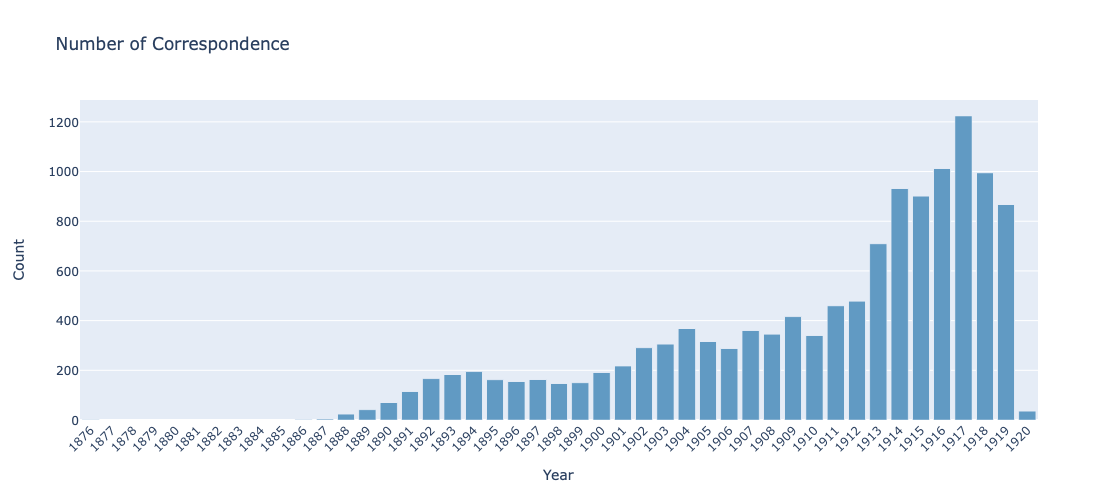

In [7]:
import plotly.graph_objects as go


# 提取键和值
years = sorted(list(result.keys()))
counts = [result[year] for year in years]
# 创建条形图
fig = go.Figure(data=[go.Bar(x=years, y=counts, marker_color='#619AC3')])

# 添加标题和标签
fig.update_layout(
    title='Number of Correspondence',
    xaxis_title='Year',
    yaxis_title='Count',
    xaxis_tickangle=-45,
    xaxis=dict(
        tickmode='linear',  # 确保所有年份都显示
        dtick=1  # 每个刻度之间的间隔为1
    ),
    yaxis=dict(
        showgrid=True  # 显示y轴网格线
    ),
    template='plotly',  # 使用默认模板，不使用白色主题
    plot_bgcolor='#E5ECF6',  # 设置背景颜色为浅蓝色
    height=500  # 设置图形高度为500
)


fig.show()

#### the Gender of Correspondents

In [19]:
import pandas as pd
import gender_guesser.detector as gender

# 创建一个 Detector 对象
gd = gender.Detector()

# 读取 Excel 文件
input_file_path = 'Correspondence.xlsx'
df = pd.read_excel(input_file_path)

# extarct unique value
unique_names = df['name'].drop_duplicates()

# 创建一个新的 DataFrame 只包含唯一的 'Name' 列
df_unique_names = pd.DataFrame(unique_names, columns=['name'])

# 将唯一值写入新的 Excel 文件
output_file_path = 'unique_names.xlsx'
df_unique_names.to_excel(output_file_path, index=False)

output_file_path


'unique_names.xlsx'

In [25]:

df = pd.read_excel(output_file_path)

# extract content before comma in column 'First Name' 
df['Last Name'] = df['name'].str.split(',').str[0]


print(df.head())



                              name             Last Name
0             Abbott, Holker, 1904                Abbott
1           Abe Shojiro, 1911-1913           Abe Shojiro
2          Abrams, Alfred W., 1919                Abrams
3  Adachi Kiroku (足立喜六), 1911-1913  Adachi Kiroku (足立喜六)
4               Adler, Elmer, 1915                 Adler


In [27]:
# Remove the part after the Last Name and strip out any numbers, then place the result into the Possible First Name column.
df['Possible First Name'] = df['name'].str.split(',').str[1].str.replace('\d+', '', regex=True).str.strip()

# show the first five rows
print(df.head())

# df.to_excel('Names in Letters.xlsx', index=False)

                              name             Last Name Possible First Name
0             Abbott, Holker, 1904                Abbott              Holker
1           Abe Shojiro, 1911-1913           Abe Shojiro                   -
2          Abrams, Alfred W., 1919                Abrams           Alfred W.
3  Adachi Kiroku (足立喜六), 1911-1913  Adachi Kiroku (足立喜六)                   -
4               Adler, Elmer, 1915                 Adler               Elmer


In [28]:
def get_gender(names):
    genders = []
    for name in names:
        
        # deal with special cases
        if ' ' in name or '.' in name:
            
            # split name with whitespace or period and detect gender one by one
            name_parts = name.replace('.', '').split(' ')
            for part in name_parts:
                gender = gd.get_gender(part)
                if gender != "unknown":
                    genders.append(gender)
        
        else:
            # if it is regular, show the gender directly
            gender = gd.get_gender(name)
            if gender != "unknown":
                genders.append(gender)
    if genders:
        # delete repeated values in genders
        genders = list(set(genders))
        # if there is only one elemnt return it， otherwise return "Unknown"
        return genders[0] if len(genders) == 1 else "Unknown"
    return "Unknown"

# apply the function and creat a new 'Gender_Three' column
df['Gender'] = df['Possible First Name'].str.split(' ').apply(get_gender)

# calculate number of differnet value of 'Gender' column
gender_counts = df['Gender'].value_counts()

# show the result
print(gender_counts)

Gender
male             286
Unknown          152
female            49
andy               6
mostly_female      4
mostly_male        2
Name: count, dtype: int64


In [30]:
df.to_excel('Names of Correspondents.xlsx', index=False)

In [ ]:
# Sort out names manually
# Mori, Sosen H
# Adachi Kiroku (足立六喜)
# Lee Van Ching (Li Wenqing 李文卿)
# McClure, J. Rosser, Mrs.
# Moore, R.E. 

In [48]:
# read the file
df = pd.read_excel('Names of Correspondents with Gender.xlsx')

# calculate number of differnet value of 'Gender' column
gender_counts = df['Gender_sorted'].value_counts()

# show the result
print(gender_counts)

Gender_sorted
male       341
Unknown     66
female      62
Group       30
Name: count, dtype: int64


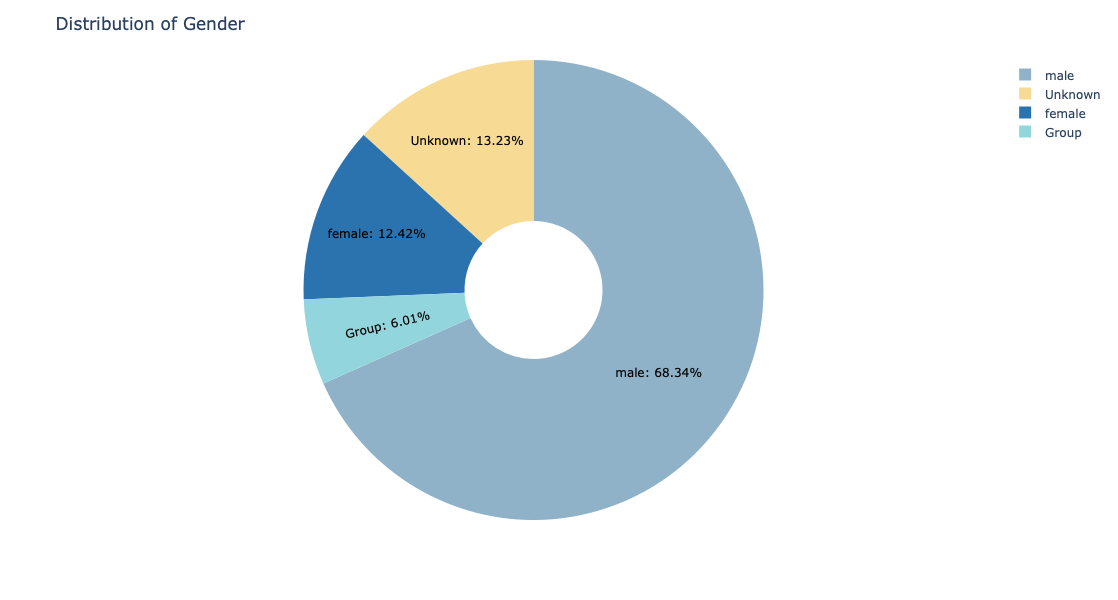

In [54]:
import pandas as pd
import plotly.express as px


# caculate for each gender
gender_counts = df['Gender_sorted'].value_counts()

# craete the chart and define the colors
fig = px.pie(gender_counts, values=gender_counts.values, names=gender_counts.index, 
             color_discrete_sequence=['#8FB2C9','#F7DA94','#2B73AF','#93D5DC'])

# define the texts
fig.update_traces(
    textinfo='percent+label',
    textfont=dict(color='black'),
    hole=0.3,
    texttemplate='%{label}: %{percent:.2%}'
)

# layout
fig.update_layout(
    title='Distribution of Gender',
    height=600, 
    width=800
)

# show the chart
fig.show()


#### Word Cloud

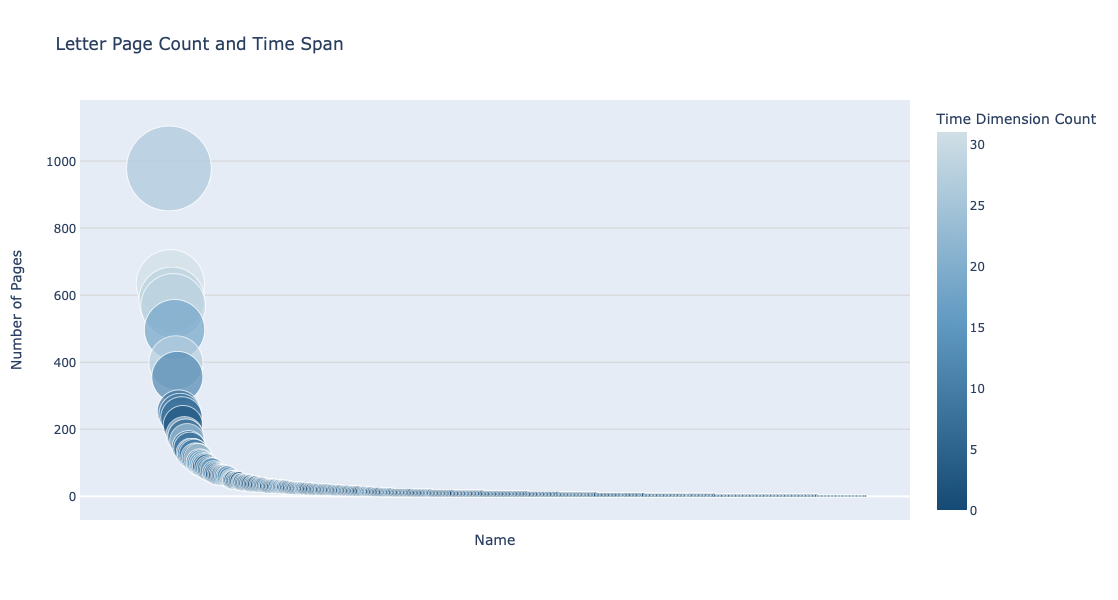

In [10]:
import pandas as pd
import plotly.express as px


df = pd.read_excel('temp_ret_two.xlsx')

# Function to calculate time dimension count
def calculate_time_dimension(years):
    if pd.isna(years):
        return 0
    elif '-' in years:
        try:
            start, end = map(int, years.split('-'))
            return end - start + 1  # Include both start and end years
        except ValueError:
            return 1  # Handle cases where years are not in proper format
    else:
        try:
            int(years)  # Check if years can be converted to int
            return 1    # Single year if no range detected
        except ValueError:
            return 0    # Handle cases where year is not numeric

# Calculate time dimension count for each unique Name
name_years = df.groupby('Name')['Year'].apply(lambda x: calculate_time_dimension(x.iloc[0])).reset_index()
name_years.columns = ['Name', 'time_dimension_count']

# Count number of messages sent by each person
name_counts = df['Name'].value_counts().reset_index()
name_counts.columns = ['Name', 'message_count']

# Merge message count and time dimension count data
name_data = pd.merge(name_counts, name_years, on='Name', how='left')

# Create bubble chart using Plotly Express
fig = px.scatter(name_data, x='Name', y='message_count', size='message_count', hover_name='Name', 
                 title='Letter Page Count and Time Span',
                 labels={'Name': 'Name', 'message_count': 'Number of Pages', 'time_dimension_count': 'Time Dimension Count'},
                 size_max=60, color='time_dimension_count', color_continuous_scale=['#144A74', '#619AC3', '#D0DFE6'],
                 range_color=[name_data['time_dimension_count'].min(), name_data['time_dimension_count'].max()])

# Update layout to improve visual appeal
fig.update_layout(
    xaxis=dict(
        title='Name',
        showgrid=True,   # Show grid lines
        gridcolor='lightgray',  # Grid color
        linecolor='white',  # color of x-axis
        linewidth=1,      # Axis line width
        tickmode='array',
        tickvals=[],      # Empty list to hide tick values
        ticktext=[]       # Empty list to hide tick text
    ),
    yaxis=dict(
        title='Number of Pages',
        showgrid=True,   # Show grid lines
        gridcolor='lightgray',  # Grid color
        linecolor='white',  # color of Y-axis
        linewidth=1       # Axis line width
    ),
    height=600,
    plot_bgcolor='#E5ECF6',  # 设置整体图表背景色
    hoverlabel=dict(
        bgcolor='white',  # Hover label background color
        font_size=12,     # Hover label font size
    )
)

# Show the plot
fig.show()
